In [1]:
import numpy as np
import networkx as nx
import tsplib95
import matplotlib.pyplot as plt
import math
import functions as f
from tsp import experiment
from tqdm import tqdm

In [2]:
filename = "ch130.tsp"
problem = tsplib95.load(filename)
G  = problem.get_graph()
layout = nx.spring_layout(G,seed=0)
arr=np.array(G.nodes)
np.random.shuffle(arr)

Closest neighbour path, Fitness: 8174.523499317165


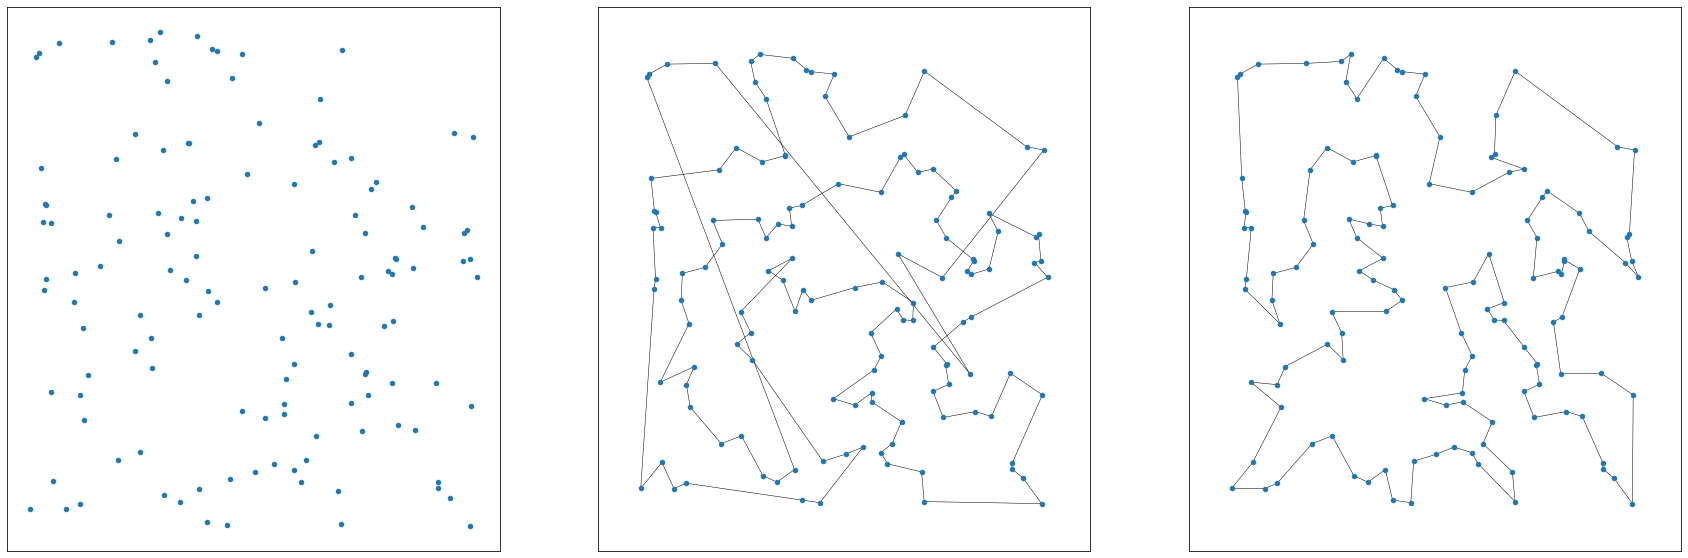

In [3]:
solution = tsplib95.load("ch130.opt.tour").tours[0]
solution = f.get_edge_list(solution)
dictionary = f.node_positions(G)
fig, axs = plt.subplots(1,3, figsize=(30,10))
# fit = str(f.get_fitness(G,solution))
nx.draw_networkx_nodes(G, pos=dictionary, node_size=20, ax=axs[0])
# print(f"Optimal path, Fitness: " + fit)
# nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[1], label=fit)
# nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs[1], label=fit)



path = f.closest_neighbor_alg(G)
fit = str(f.get_fitness(G,f.get_edge_list(path)))
print(f"Closest neighbour path, Fitness: " + fit)
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[1], label=fit)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=f.get_edge_list(path), ax=axs[1], label=fit)

nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[2], label=fit)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs[2], label=fit)
plt.show()

In [4]:
%%time

experiment(filename="att48.tsp", iterations=1000, interval=100, pop_size=20)

TSP problem used:   att48.tsp
Num. iterations:    1000
Interval:           100
Population size:    20
Mutation rate:      0.1
Show outputs:       True
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Best fitness: 51478.48860330595
CPU times: total: 6.2 s
Wall time: 6.56 s
